In [1]:
#######################################################################################################
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import sys

# Get the current notebook's directory
notebook_dir = os.path.abspath('')
# Add the relative path to your Codes directory
codes_path = os.path.join(notebook_dir, "..", "Codes")
codes_path = os.path.abspath(codes_path)  # Normalize the path
# Add to path if not already there
if codes_path not in sys.path:
    sys.path.insert(1, codes_path)
from myUtils import *

MAINPATH is set to: /home/emanuele/Research/APES/FHN/


In [11]:
# Custom regions shapefiles 
shapef = os.path.join(MAINPATH, 'Data/SHAPEFILES/world-custom_regions_r.shp')
gdf1 = gpd.read_file(shapef)
gdf1 = gdf1.to_crs("ESRI:54009")
gdf1

,custom_reg,geometry
0,Central Asia,"POLYGON ((6292588.954 4718353.773, 6293948.069..."
1,Eastern Africa,"MULTIPOLYGON (((2969936.794 -2734653.784, 2969..."
2,Eastern Asia,"MULTIPOLYGON (((10700600.004 2451001.959, 1070..."
3,Eastern Europe,"MULTIPOLYGON (((1603623.000 5466387.949, 15912..."
4,Middle Africa,"MULTIPOLYGON (((1105431.038 -476135.126, 11018..."
5,Northern Africa,"MULTIPOLYGON (((-811430.932 3219649.566, -8125..."
6,Northern America,"MULTIPOLYGON (((-16038219.119 -49217.924, -160..."
7,Northern Europe,"MULTIPOLYGON (((-163938.298 5789293.124, -1651..."
8,Oceania,"MULTIPOLYGON (((11330271.619 -6338269.085, 113..."
9,South America,"MULTIPOLYGON (((-6081932.530 -5320253.018, -60..."


In [2]:
df = pd.read_csv(os.path.join(MAINPATH, 'Data', 'OUTPUT', 'FPP','df_5_regions.csv' ))
df

,FPP,Region,Year
0,9.792258e+02,0,1975
1,1.970415e+06,1,1975
2,1.386195e+07,2,1975
3,5.638404e+05,3,1975
4,6.450112e+06,4,1975
...,...,...,...
165,2.017343e+07,12,2020
166,2.721476e+05,13,2020
167,2.987173e+06,14,2020
168,1.698132e+05,15,2020


In [17]:
df2020 = df[df['Year']==2020]
df2020['Region_name'] = gdf1['custom_reg'].values
df2020

,FPP,Region,Year,Region_name
153,1.939254e+03,0,2020,Central Asia
154,2.867807e+06,1,2020,Eastern Africa
155,7.528103e+06,2,2020,Eastern Asia
156,2.703096e+05,3,2020,Eastern Europe
157,5.852401e+06,4,2020,Middle Africa
158,1.834776e+05,5,2020,Northern Africa
159,1.225882e+07,6,2020,Northern America
160,1.266705e+05,7,2020,Northern Europe
161,2.714991e+05,8,2020,Oceania
162,3.004154e+06,9,2020,South America


In [21]:
df2020 = df2020.sort_values(by='FPP').reset_index(drop=True)
colors = df2020['Region_name'].map(REGION_TO_CONTINENT).map(CONTINENT_COLORS)

In [22]:
df2020

,FPP,Region,Year,Region_name
0,1.939254e+03,0,2020,Central Asia
1,1.393979e+04,11,2020,Southern Africa
2,1.266705e+05,7,2020,Northern Europe
3,1.282250e+05,16,2020,Western Europe
4,1.698132e+05,15,2020,Western Asia
5,1.834776e+05,5,2020,Northern Africa
6,2.703096e+05,3,2020,Eastern Europe
7,2.714991e+05,8,2020,Oceania
8,2.721476e+05,13,2020,Southern Europe
9,1.012597e+06,10,2020,South-Eastern Asia


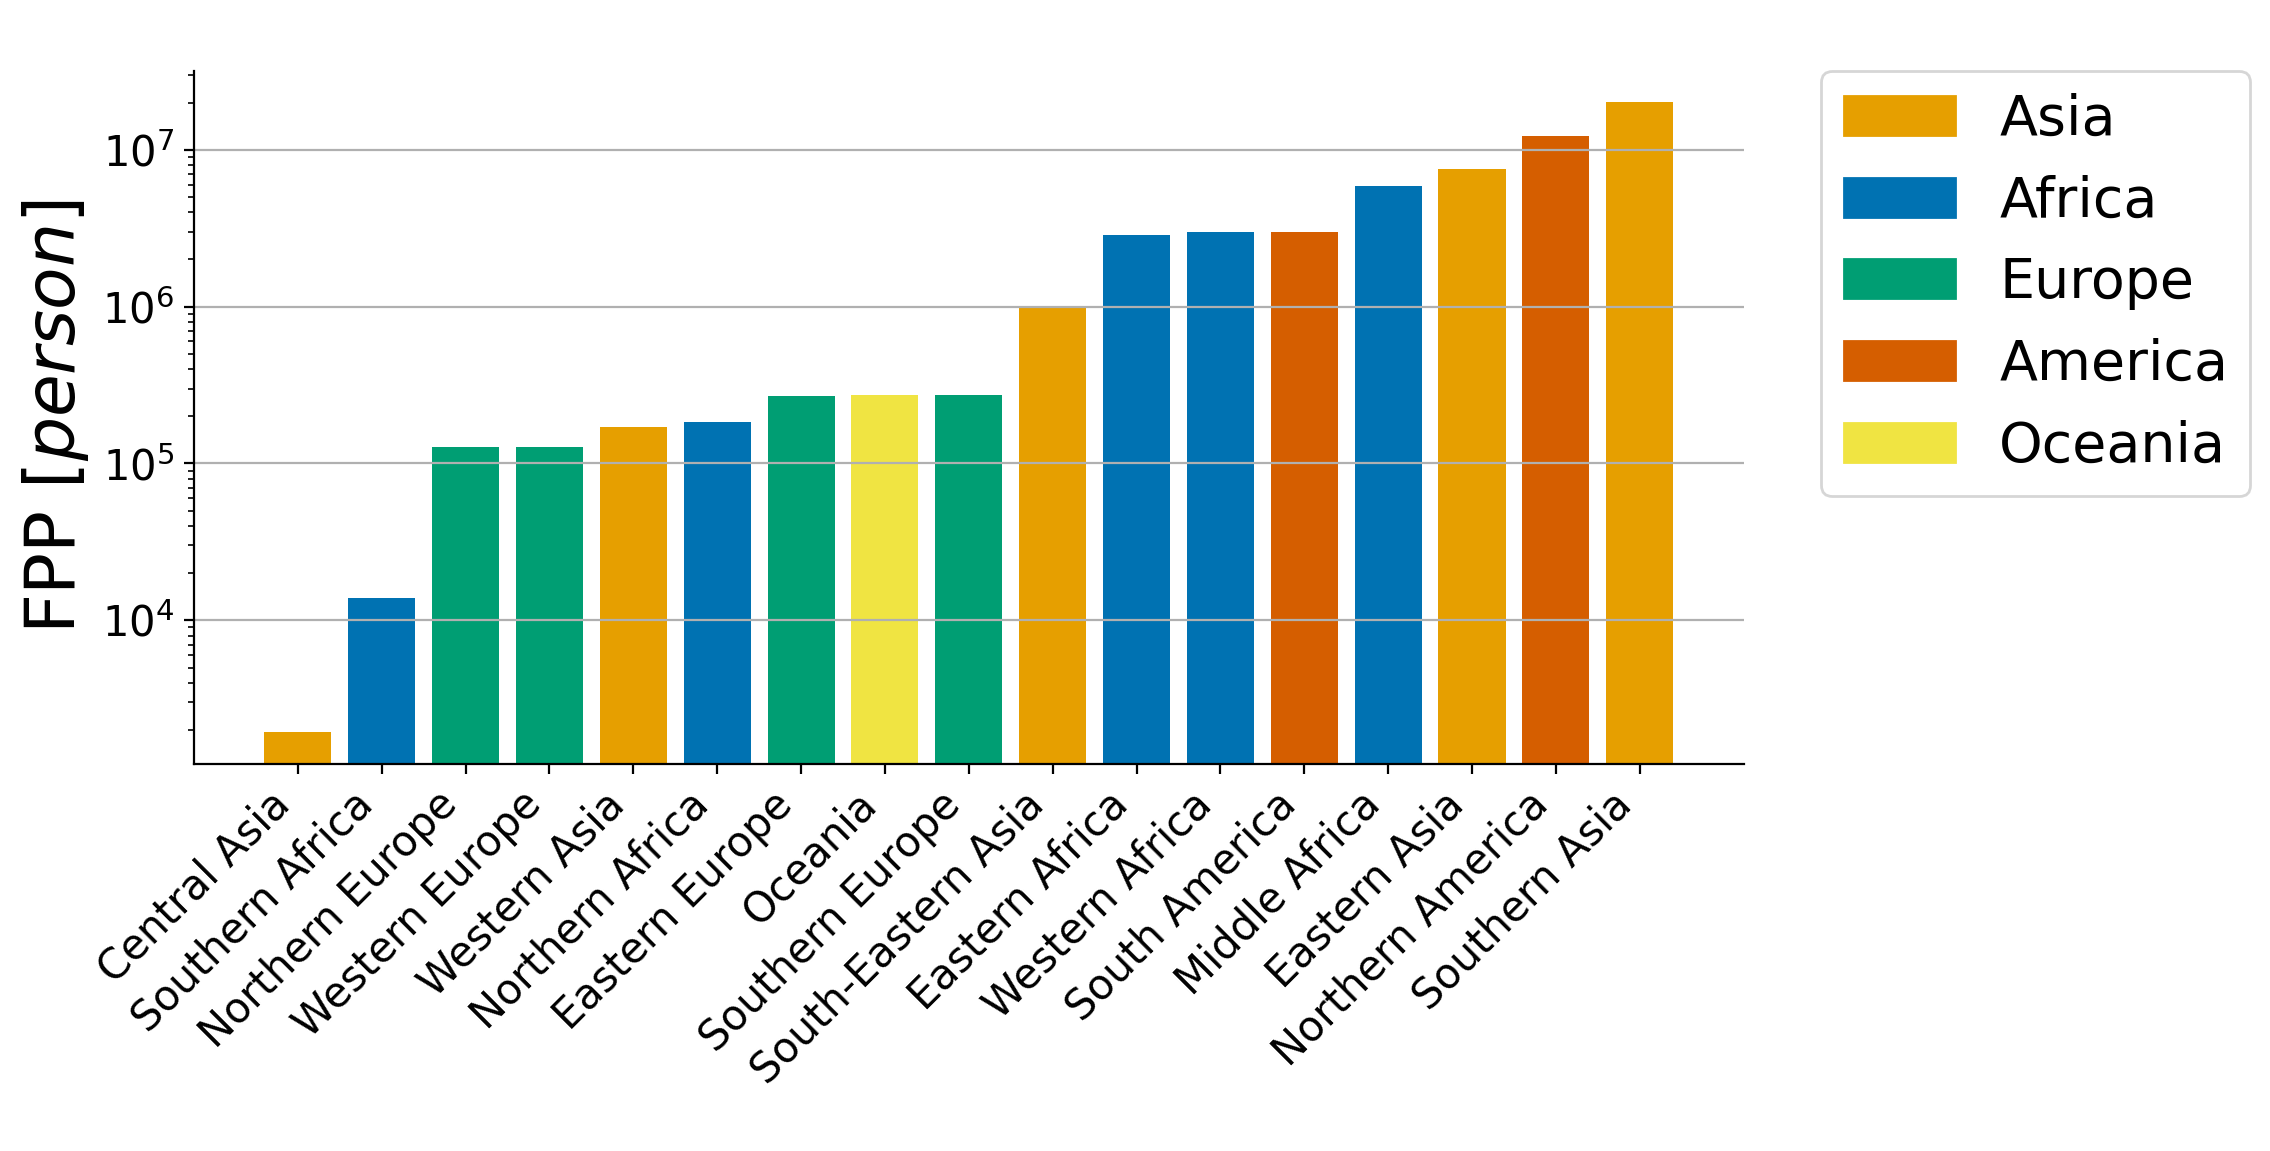

In [28]:
# Plotting the bar plot
f, ax = plt.subplots(figsize=(10, 4.5))
ax = set_font(ax, 15)
plt.bar(df2020['Region_name'], df2020['FPP'], color=colors)
# Adding labels and title
plt.xlabel(' ')
plt.ylabel('FPP '+r'$[person]$', size=25)
plt.title(' ', size=16)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Creating legend patches
patches = [mpatches.Patch(color=color, label=continent) for continent, color in CONTINENT_COLORS.items()]
# Adding the legend outside the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=20)
plt.xticks(rotation=45, ha='right');
ax.set_yscale('log')